# Economic Indexes Analysis

This notebook is designed to analyze various economic indexes using data from the Federal Reserve Economic Data (FRED) API. Our goal is to extract meaningful insights from these indexes, which can include measurements like S&P 500, Pull Participation Rate, employment figures, etc. This analysis will help in understanding the current economic trends and potentially forecast future economic scenarios.


In [1]:
# Python Version Check
# Ensures that the Python environment is suitable for this analysis.

!python --version

Python 3.10.12


## Environment Setup

To run this notebook, ensure you have Python 3.6+ installed. We use the `fredapi` package, which can be installed using `pip install fredapi`. You will also need a FRED API key, which can be obtained by signing up at [FRED's website](https://fred.stlouisfed.org/). Please keep your API key confidential and avoid sharing it in public repositories.


In [2]:
# Library Installation
# Installing 'fredapi' package for accessing the FRED API for economic data.

!pip install fredapi > /dev/null

In [3]:
# Library Imports
# Importing necessary libraries for data manipulation, analysis, and visualization.
# 'pandas' and 'numpy' for data handling, 'matplotlib' and 'seaborn' for plotting,
# 'plotly' for interactive visualizations.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

### Data Retrieval

In the following sections, we will connect to the FRED API using the provided API key and retrieve various economic indexes.


In [4]:
# Create an instance of the fred api, passing the key for your account

# Do it like this:
# fred_key= 'your key here'

In [5]:
fred_key = '03bf0b082e629ce42bee8c83c3f33560'

# **Create The Fred Object**




In [6]:
fred = Fred(api_key=fred_key)

### Data Analysis

After retrieving the data, we'll perform exploratory data analysis to identify trends, patterns, and anomalies.


# **Search For Economic Data**

In [7]:
sp_search = fred.search('S&P', order_by='popularity')
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-01-17,2024-01-17,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-01-16,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-01-17 07:58:06-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-01-17,2024-01-17,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2023-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-12-26 08:12:02-06:00,87,"For more information regarding the index, plea..."
SP500,SP500,2024-01-17,2024-01-17,S&P 500,2014-01-17,2024-01-16,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-01-16 19:10:59-06:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-01-17,2024-01-17,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,82,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-01-17,2024-01-17,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-01-16,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-01-17 07:58:10-06:00,82,This data represents the effective yield of th...


# **Pull Raw Data & Plot**

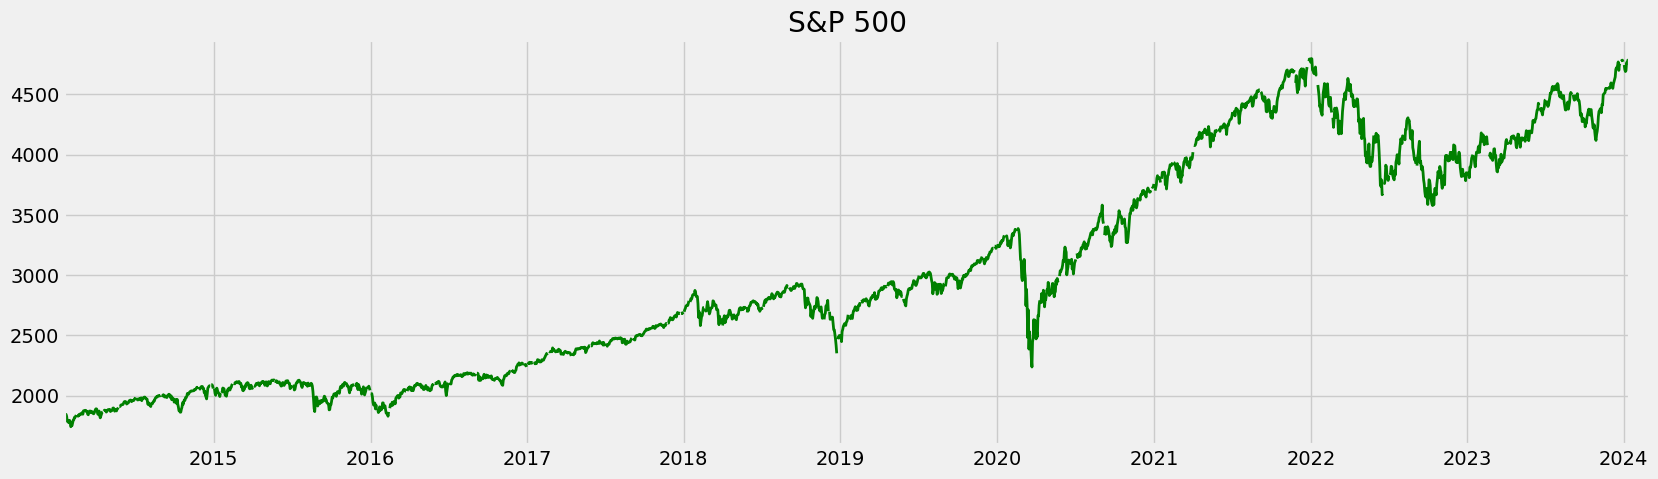

In [8]:
# If it is required we can determine a start and end date for the time series
sp500 = fred.get_series(series_id='SP500')

sp500.plot(figsize=(18, 5), title='S&P 500', lw=2, color='green')
plt.show()


# **Pull and Join Multiple Data Series**

The objective is to analyse the behavior of the rate of unemployment per state in USA, monthly

In [9]:
#let's take a look at the data
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))

unemp_df.head(5)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-01-17,2024-01-17,Unemployment Rate,1948-01-01,2023-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-01-12 10:28:02-06:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-01-17,2024-01-17,Unemployment Rate,1948-01-01,2023-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-01-05 07:45:29-06:00,54,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-01-17,2024-01-17,Unemployment Rate - Black or African American,1972-01-01,2023-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-01-12 10:28:18-06:00,68,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2024-01-17,2024-01-17,Unemployment Level,1948-01-01,2023-12-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-01-12 10:28:18-06:00,67,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2024-01-17,2024-01-17,Unemployment Rate - Black or African American,1972-01-01,2023-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-01-05 07:46:15-06:00,20,The series comes from the 'Current Population ...


In [10]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')] #at this way we will get the series associted with a state

In [11]:
unemp_df.index #let's take a look at the indexes

Index(['CAUR', 'TXUR', 'FLUR', 'NYUR', 'OHUR', 'MIUR', 'PAUR', 'ALUR', 'ILUR',
       'NCUR', 'NJUR', 'COUR', 'GAUR', 'MNUR', 'MAUR', 'SCUR', 'AZUR', 'IAUR',
       'VAUR', 'WIUR', 'KYUR', 'ORUR', 'MDUR', 'TNUR', 'WVUR',
       'LASMT261982000000003', 'WAUR', 'LAUR', 'UTUR', 'INUR', 'MOUR', 'ARUR',
       'NVUR', 'AKUR', 'PRUR', 'OKUR', 'NMUR', 'KSUR', 'CTUR', 'HIUR', 'NDUR',
       'WYUR', 'MTUR', 'MSUR', 'RIUR', 'NHUR', 'MEUR', 'IDUR',
       'LASMT391746000000003', 'NEUR', 'DCUR', 'DEUR', 'SDUR', 'VTUR',
       'CMWRUR', 'CNERUR', 'USAURAMS', 'CNEWUR', 'CWSTUR', 'CSOUUR'],
      dtype='object', name='series id')

In [12]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid) #get each series from unemp_df
    results = results.to_frame(name=myid) #it turns into a data frame
    all_results.append(results)
    time.sleep(0.1) # Don't request it too fast or it might get blocked

uemp_results = pd.concat(all_results, axis=1) #concatenate all the results horizontaly

uemp_results


,CAUR,TXUR,FLUR,NYUR,OHUR,MIUR,PAUR,ALUR,ILUR,NCUR,...,DCUR,DEUR,SDUR,VTUR,CMWRUR,CNERUR,USAURAMS,CNEWUR,CWSTUR,CSOUUR
1976-01-01,9.2,5.8,9.7,10.3,8.1,9.9,8.0,6.6,6.6,6.4,...,8.7,8.0,3.3,8.6,6.8,9.6,NaN,9.6,8.6,6.9
1976-02-01,9.2,5.8,9.7,10.3,8.1,9.9,8.1,6.6,6.6,6.4,...,8.7,8.0,3.3,8.6,6.8,9.6,NaN,9.6,8.6,6.9
1976-03-01,9.1,5.9,9.6,10.2,8.1,9.9,8.1,6.6,6.6,6.4,...,8.6,8.0,3.2,8.6,6.8,9.6,NaN,9.6,8.6,6.9
1976-04-01,9.1,5.9,9.5,10.2,8.0,9.8,8.1,6.5,6.6,6.3,...,8.5,8.1,3.1,8.6,6.7,9.5,NaN,9.4,8.5,6.8
1976-05-01,9.0,5.9,9.3,10.1,7.8,9.6,8.1,6.4,6.6,6.1,...,8.4,8.3,3.1,8.5,6.6,9.5,NaN,9.3,8.5,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,4.6,4.1,2.7,3.9,3.3,3.6,3.5,2.1,4.0,3.3,...,5.0,4.1,1.9,1.8,3.2,3.5,NaN,2.7,4.0,3.2
2023-08-01,4.6,4.1,2.7,3.9,3.4,3.7,3.5,2.1,4.1,3.3,...,5.0,4.1,1.9,1.8,3.3,3.5,NaN,2.7,4.0,3.2
2023-09-01,4.7,4.1,2.8,4.0,3.4,3.9,3.4,2.2,4.4,3.4,...,5.0,4.1,1.9,1.9,3.4,3.6,NaN,2.7,4.1,3.2
2023-10-01,4.8,4.1,2.8,4.2,3.6,4.1,3.4,2.3,4.6,3.4,...,5.0,4.2,2.0,2.0,3.6,3.7,NaN,2.8,4.2,3.3


In [13]:
# drop all the series that are not releated with a state
# there are no state abreviations with more than 4 letters
cols_to_drop = []
for col_name in uemp_results:
    if len(col_name) > 4:
        cols_to_drop.append(col_name)

uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

uemp_results.shape

(575, 52)

In [14]:
#drop missing values
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()

uemp_states.shape

(573, 52)

In [15]:
#replace the abrebiation of the state with the name

id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()

uemp_states.columns=[id_to_state[c] for c in uemp_states.columns]

In [16]:
# Plot States Unemployment Rate
px.line(uemp_states)

# **Pull April 2020 Unemployment Rate Per State**

Let's analyse what happened on this month, because there are anormal values

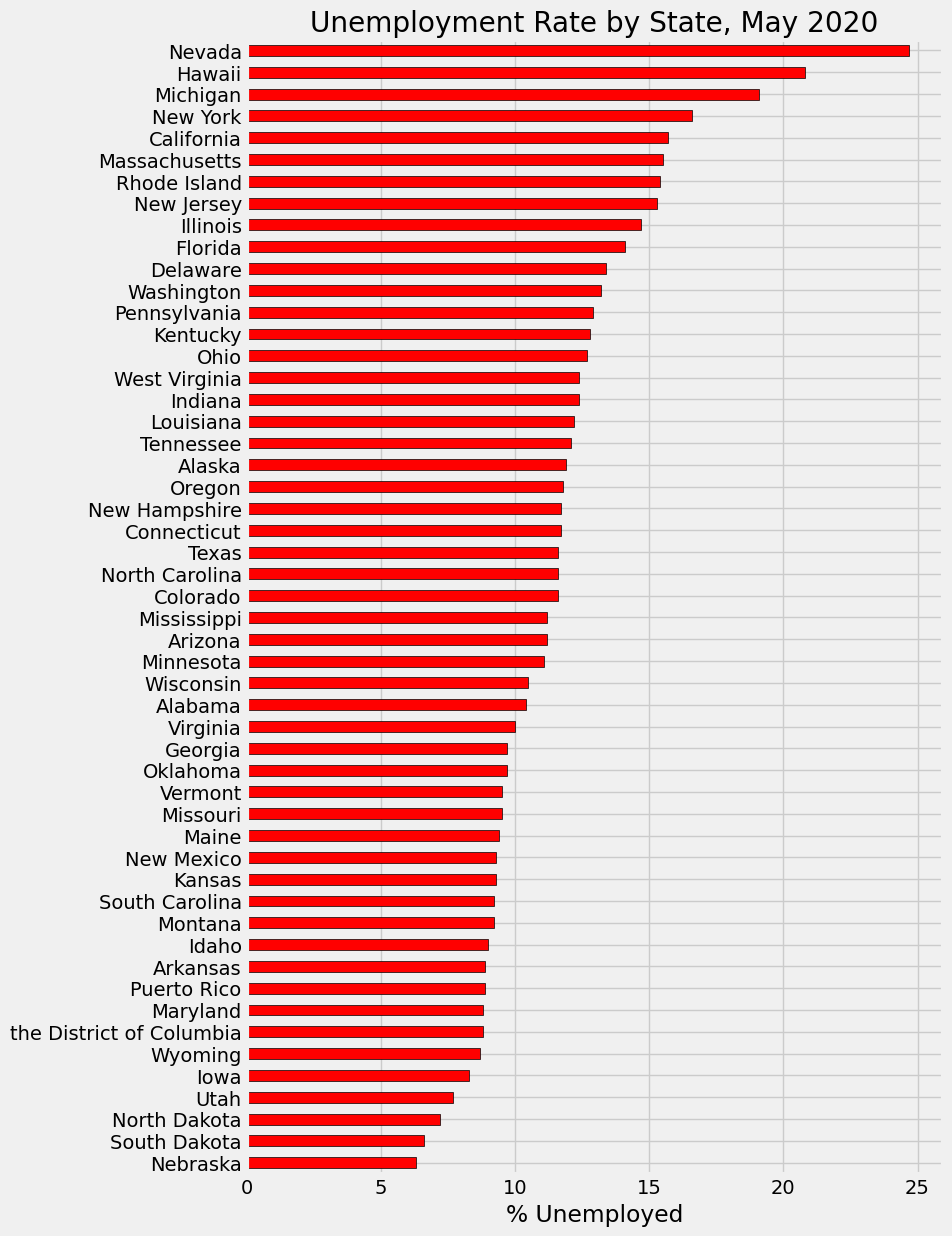

In [17]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 14), width=0.5, edgecolor='black',color='red',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

# **Pull Participation Rate**

In [18]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [19]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request it too fast or it might get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

# **Plot Unemployment vs Participation for each state!**

In [20]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

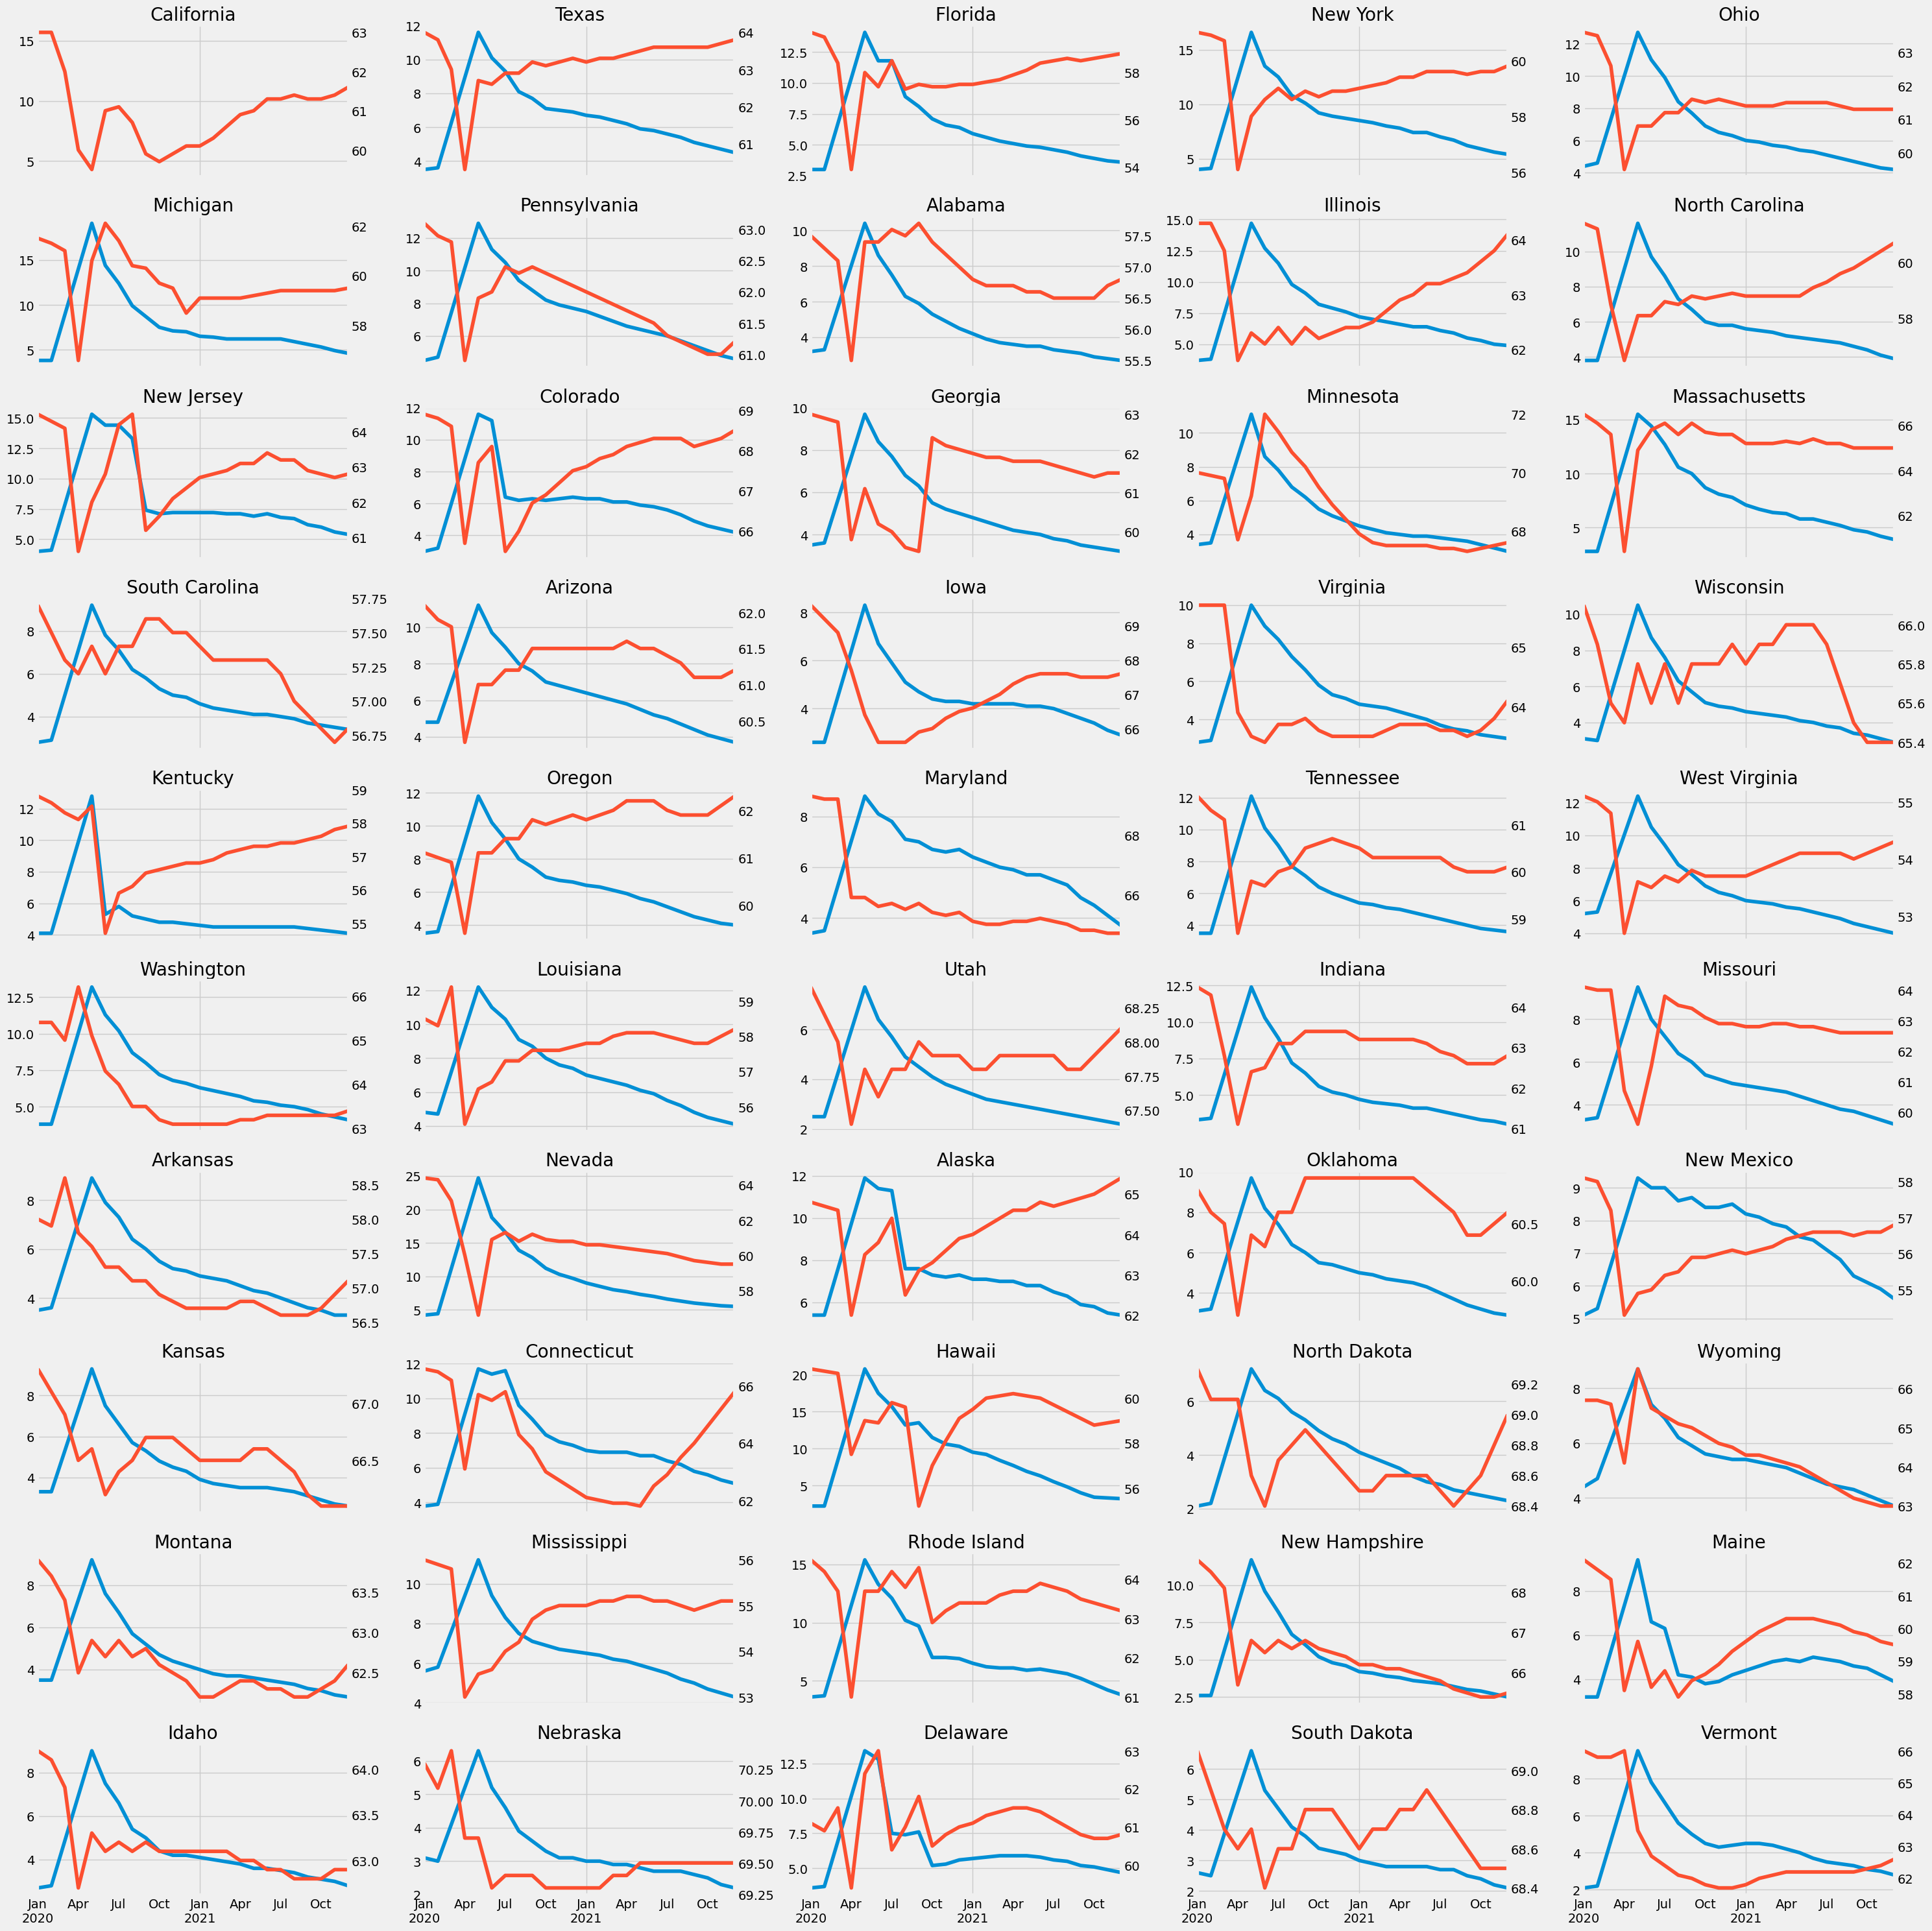

In [21]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

# California state

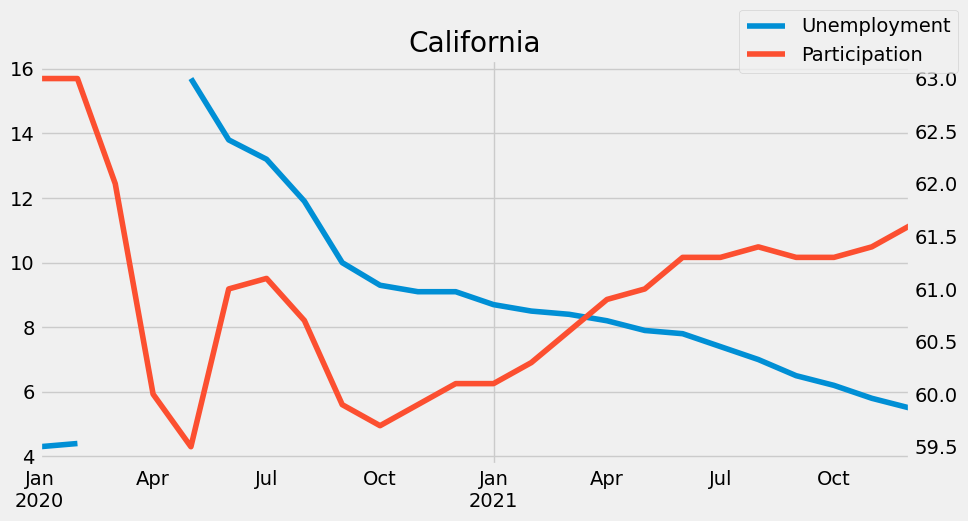

In [22]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()

## Conclusion

In this notebook, we analyzed several important economic indexes. The insights gained from this analysis provide a deeper understanding of the current economic landscape and can inform both economic and business decisions. Future analyses may expand on this by incorporating additional data sources or employing more advanced analytical techniques.


## References and Further Reading

- [Federal Reserve Economic Data (FRED)](https://fred.stlouisfed.org/)
- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html)
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [Plotly Python Graphing Library](https://plotly.com/python/)
